In [1]:
clear all
set more off
macro drop _all
set seed 8675309
set linesize 100
set scheme dubois, permanently







(set scheme preference recorded)


In [2]:
%set graph_format svg --permanently

In [9]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("AGI") firstrow clear
quietly label define AGI_lab 1 "$100-$30K" 2 "$30K-$48K" 3 "$48K-$75K" 4 "$75K-$110K" 5 "$110K-$500K" 
quietly label values AGI AGI_lab

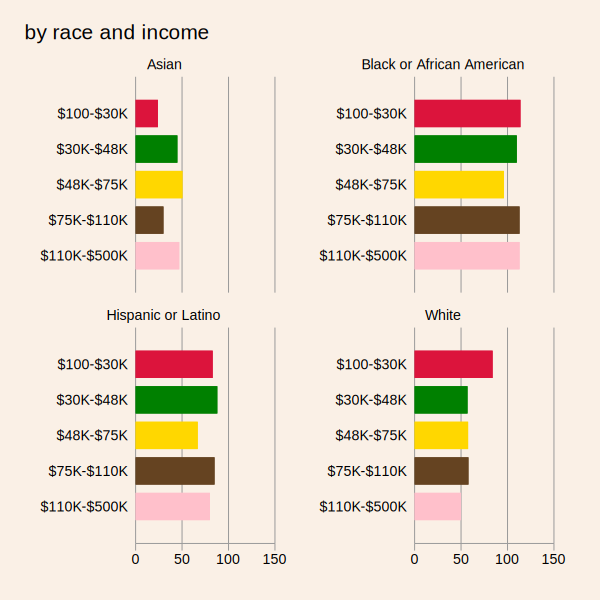

In [10]:
graph hbar Debt_ratio, over(AGI, gap(30)) ytitle("") asyvars showyvars xsize(5) ysize(5)  by(Race_Ethnicity, legend(off) title("by race and income", span position(11)) note("", size(small) position(2))) name(AGI, replace)

In [11]:
quietly import excel using "https://github.com/jcolond/dnd/raw/master/dnd.xlsx", sheet("EFC") firstrow clear
quietly label define EFC_lab 1 "$0" 2 "$1-$2,599" 3 "$2,600-$7,199" 4 "$7,200-$15,599" 5 "$15,600+" 
quietly label values EFC EFC_lab

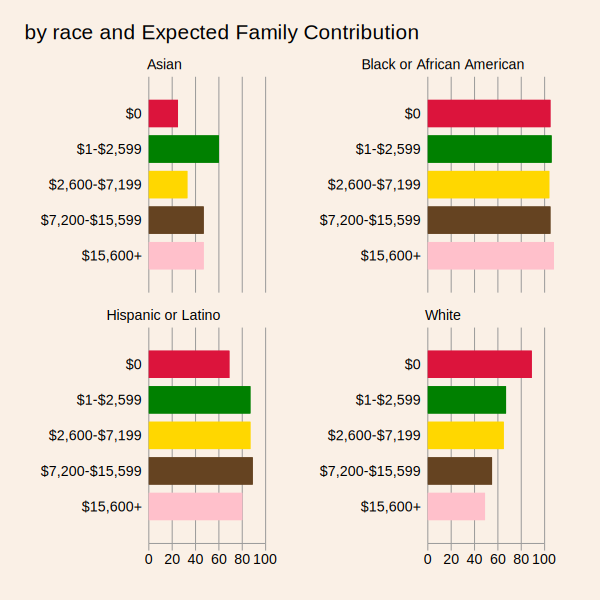

In [12]:
graph hbar Debt_ratio, over(EFC, gap(30)) ytitle("") asyvars showyvars xsize(5) ysize(5)  by(Race_Ethnicity, legend(off) title("by race and Expected Family Contribution", span position(11)) note("", size(small) position(2))) name(EFC, replace)

In [13]:
clear
quietly set obs `=20'
quietly gen race=4
quietly replace race=3 if _n<16
quietly replace race=1 if _n<11
quietly replace race=2 if _n<6
label define race 1 "Black" 2 "white" 3 "Latinx" 4 "Asian"
label values race race
quietly gen efc=1
quietly replace efc=2 if _n==2 | _n==7 | _n==12 | _n==17
quietly replace efc=3 if _n==3 | _n==8 | _n==13 | _n==18
quietly replace efc=4 if _n==4 | _n==9 | _n==14 | _n==19
quietly replace efc=5 if _n==5 | _n==10 | _n==15 | _n==20
quietly label define efc 1 "$0" 2 "$1-2,599" 3 "$2,600-7,199" 4 "$7,200-15,599" 5 "$15,600 +"
quietly label values efc efc
quietly gen pcthelp=11.6368 if _n==1
quietly replace pcthelp=8.632 if _n==6
quietly replace pcthelp=13.0130 if _n==11
quietly replace pcthelp=9.3606 if _n==16
quietly replace pcthelp=15.2168 if _n==2
quietly replace pcthelp=11.3907 if _n==7
quietly replace pcthelp=15.0896 if _n==12
quietly replace pcthelp=22.6309 if _n==17
quietly replace pcthelp=16.0815 if _n==3
quietly replace pcthelp=7.6035 if _n==8
quietly replace pcthelp=15.4896 if _n==13
quietly replace pcthelp=22.4566 if _n==18
quietly replace pcthelp=21.5403 if _n==4
quietly replace pcthelp=9.5468 if _n==9
quietly replace pcthelp=18.0492 if _n==14
quietly replace pcthelp=. if _n==19
quietly replace pcthelp=25.6239 if _n==5
quietly replace pcthelp=30.1301 if _n==10
quietly replace pcthelp=16.1942 if _n==15
quietly replace pcthelp=. if _n==20
quietly rename race race2
quietly recode race2 (1=1 Black)(2=3 white)(3=2 Latinx)(4=4 Asian), gen(race)


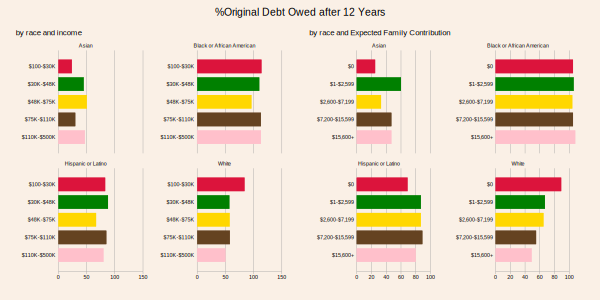

In [14]:
graph combine AGI EFC, title(%Original Debt Owed after 12 Years) xsize(10) ysize(5) name(AGIEFC, replace) row(1)

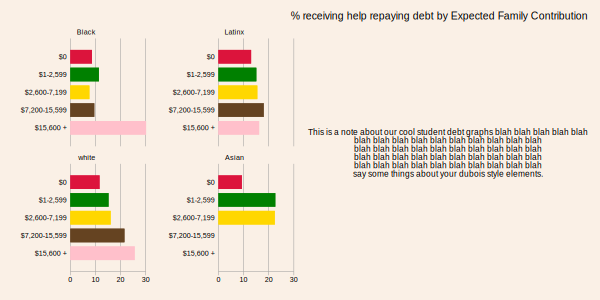

In [29]:
graph hbar pcthelp, over(efc, gap(30)) ytitle("") asyvars showyvars scheme(dubois) xsize(10) ysize(5) by(race, legend(off) title("% receiving help repaying debt by Expected Family Contribution", span position(1)) note(" " "This is a note about our cool student debt graphs blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""blah blah blah blah blah blah blah blah blah blah""say some things about your dubois style elements.", size(small) position(3))) name(PCTHELP, replace)

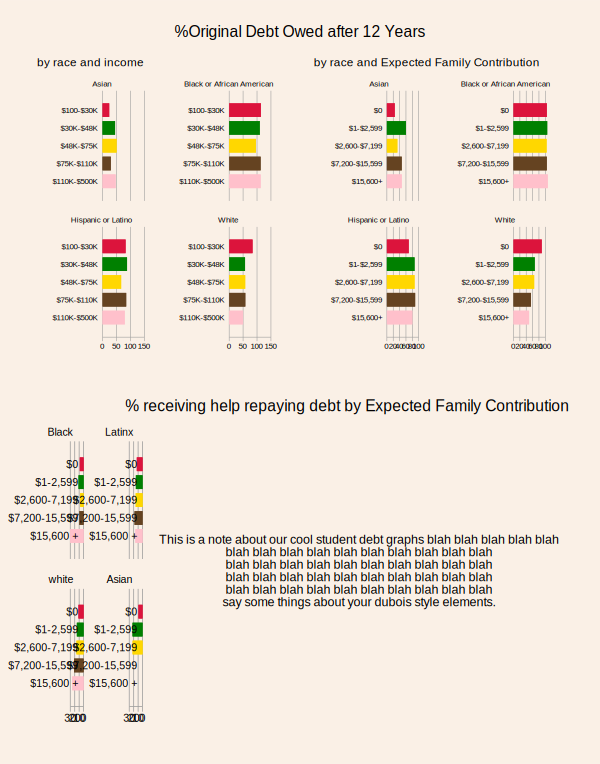

In [30]:
graph combine AGIEFC PCTHELP, rows(2)